In [1]:
%env CUDA_VISIBLE_DEVICES=-1
%env TOOLBOX_PATH='/home/a_razumov/opt/bart'
import os
import math
import numpy as np
import pylab as plt
plt.style.use('dark_background')
import torch
import h5py
from torch.fft import fftshift, ifftshift, fftn, ifftn

import sys
sys.path.append('/home/a_razumov/opt/bart/python')
import bart

env: CUDA_VISIBLE_DEVICES=-1
env: TOOLBOX_PATH='/home/a_razumov/opt/bart'


In [16]:
hf = h5py.File('/home/a_razumov/smbmount_a_razumov/multicoil_train/file1002194.h5')
ks = torch.from_numpy(hf['kspace'][:])
ks.shape

torch.Size([37, 15, 640, 372])

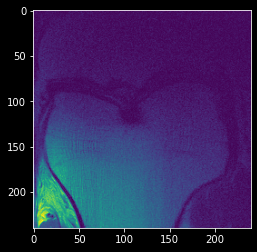

torch.Size([37, 15, 240, 240])

In [17]:
img = ifftshift(ifftn(ks, dim=(-1,-2)), dim=(-1,-2)).abs()
img = img[:, :, 200:-200, 66:-66]
plt.imshow(img[20,14])
plt.show()
img.shape

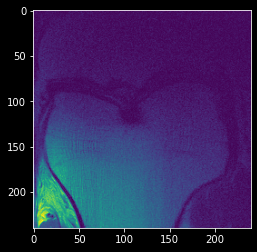

In [18]:
ks = ifftshift(fftn(fftshift(img, dim=(-1, -2)), dim=(-1, -2)), dim=(-1,-2))
img = ifftshift(ifftn(ks, dim=(-1,-2)), dim=(-1,-2)).abs()
plt.imshow(img[20,14])
plt.show()

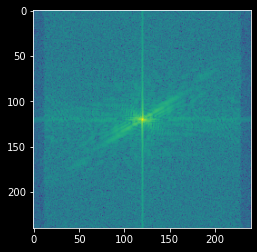

In [19]:
plt.imshow(ks[20,14].abs().log())
plt.show()

In [20]:
sens_maps = bart.bart(
    1, "ecalib -d0 -m1 -S -a -W",
    torch.view_as_complex(torch.view_as_real(ks[20]).permute(1, 2, 0, 3)[None]).numpy()
)

In [21]:
sens_maps.shape

(1, 240, 240, 15)

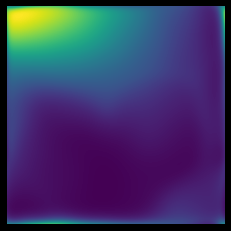

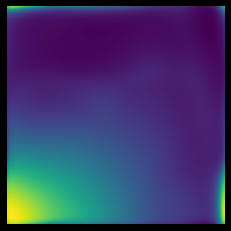

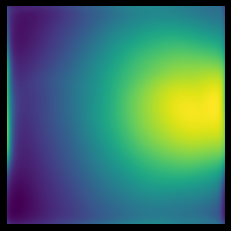

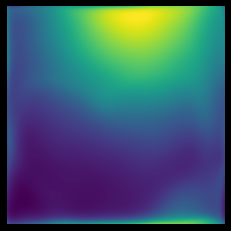

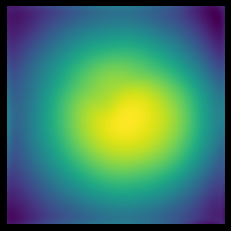

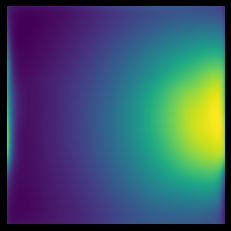

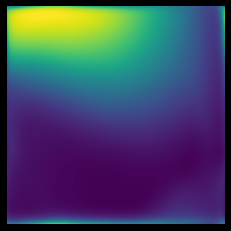

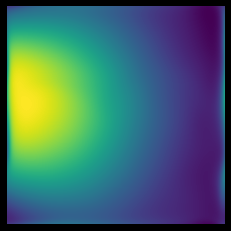

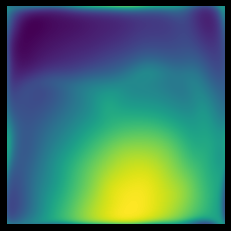

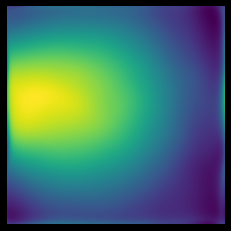

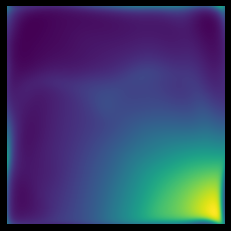

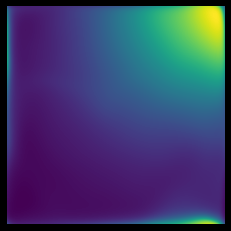

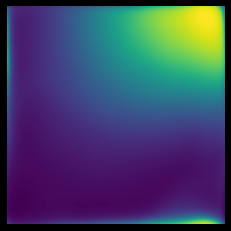

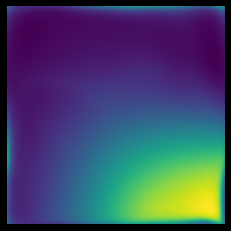

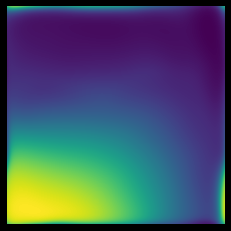

In [22]:
for i in range(sens_maps.shape[3]):
    plt.imshow(np.abs(sens_maps[0, :, :, i]))
    plt.axis('off')
    plt.show()

In [23]:
smaps = torch.from_numpy(sens_maps)[0].permute(2, 0, 1)

In [24]:
hf = h5py.File('/home/a_razumov/small_datasets/brats_h5/val.h5', 'r')

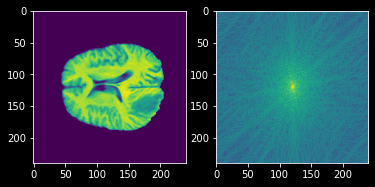

In [42]:
# img = torch.from_numpy(hf['0'][0])
img = torch.from_numpy(hf['0'][0, :, :, 80])
ks = ifftshift(fftn(fftshift(img[None] * smaps, dim=(-1, -2)), dim=(-1, -2)), dim=(-1,-2))
img = ifftshift(ifftn(ks, dim=(-1,-2)), dim=(-1,-2)).abs().square().sum(0).sqrt()

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(ks[3].abs().log())
plt.show()

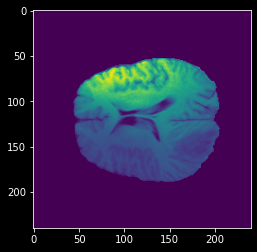

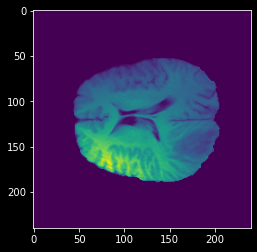

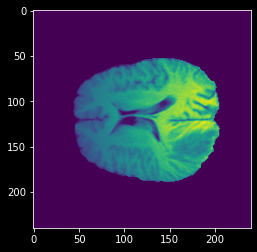

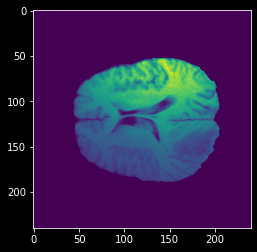

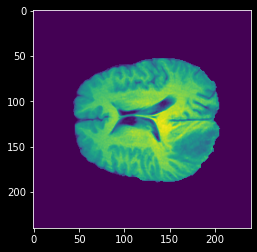

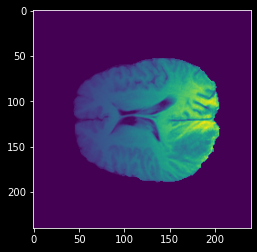

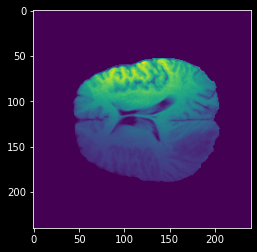

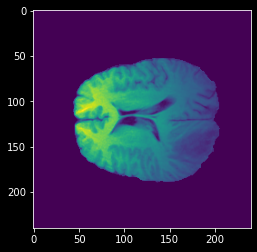

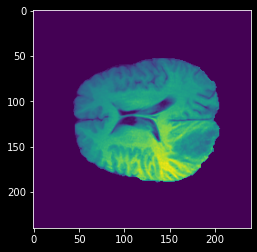

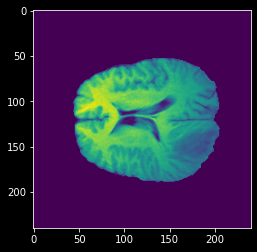

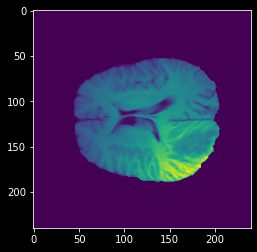

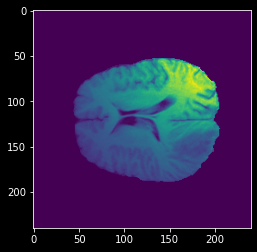

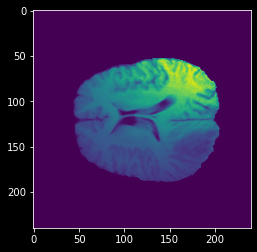

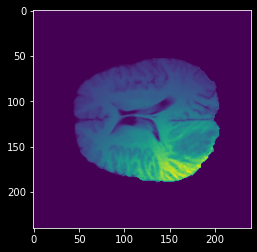

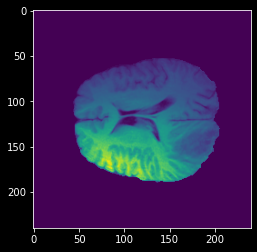

In [43]:
img = ifftshift(ifftn(ks, dim=(-1,-2)), dim=(-1,-2)).abs()
for i in range(img.shape[0]):
    plt.imshow(img[i])
    plt.show()

In [44]:
torch.save(smaps, 'smap_240.pt')